In [28]:
print("hello world!")

hello world!


In [29]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

ImportError: cannot import name 'urlib' from 'six.moves' (unknown location)

# GET DATA

In [3]:
req = requests.get('https://www.cartolafcbrasil.com.br/scouts/cartola-fc-2020/rodada-1')

if req.status_code == 200:
    print("ok!")
    content = req.content

ok!


In [4]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [5]:
table_str = str(table)
df = pd.read_html(table_str)[0]

In [25]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import random
import time

chrome_options = webdriver.ChromeOptions()
# prefs = {"profile.default_content_setting_values.notifications": 2}
# chrome_options.add_experimental_option("prefs", prefs)
# A randomizer for the delay
seconds = 5 + (random.random() * 5)
# create a new Chrome session
driver = webdriver.Chrome('/home/carlos/Documents/carlos/handson-cartola-machine-learnig-approach/chromedriver')
driver.implicitly_wait(30)
# driver.maximize_window()

# navigate to the application home page
driver.get("https://www.cartolafcbrasil.com.br/scouts/cartola-fc-2020/rodada-2")
time.sleep(seconds)
time.sleep(seconds)
# Add more to range for more phones
for i in range(1):
    element = driver.find_element_by_xpath("////////////////tr[@class='tbpaging']/////a[2]")
    print(element)
#     element.click()
    driver.execute_script("arguments[0].click();", element)
    time.sleep(seconds)
    time.sleep(seconds)
html = driver.page_source
soup = BeautifulSoup(req.content, 'html.parser')
table = soup.find('table')
print(table)
# for container in containers:
# # Add error handling
#     try:
#         name = container.h3.text
#         price = container.find("span", {'class': 'p_price'}).text
#         print("Name : " + name.replace(",", " "))
#         print("Price : " + price)
#     except AttributeError:
#         continue
driver.quit()

url = "https://www.cartolafcbrasil.com.br/scouts/cartola-fc-{}/rodada-{}"

InvalidSelectorException: Message: invalid selector: Unable to locate an element with the xpath expression ////////////////tr[@class='tbpaging']/////a[2] because of the following error:
SyntaxError: Failed to execute 'evaluate' on 'Document': The string '////////////////tr[@class='tbpaging']/////a[2]' is not a valid XPath expression.
  (Session info: chrome=92.0.4515.159)


In [6]:
def scrape_stats(url, year_start, year_end, round_start, round_end):
    years = range(year_start, year_end + 1, 1)
    rounds  = range(round_start, round_end + 1, 1)
    
    final_df = pd.DataFrame()
    
    for year in years:
        for match in rounds:
            print("Extracting season {} round {} stats.".format(year, match))
            req_url = url.format(year, match)
            req = requests.get(req_url)
            soup = BeautifulSoup(req.content, 'html.parser')
            table = soup.find('table')
            table.find("tr",{"class":"tbpaging"}).extract()
            
            df = pd.read_html(str(table))[0]
            df['Year'] = year
            df['Round'] = match
            
            final_df = final_df.append(df)
            
    return final_df

url = "https://www.cartolafcbrasil.com.br/scouts/cartola-fc-{}/rodada-{}"
df_2020 = scrape_stats(url, 2020,2020,1,38)
df_2021 =  scrape_stats(url, 2021,2021,1,22)

Extracting season 2020 round 1 stats.
Extracting season 2020 round 2 stats.
Extracting season 2020 round 3 stats.
Extracting season 2020 round 4 stats.
Extracting season 2020 round 5 stats.
Extracting season 2020 round 6 stats.
Extracting season 2020 round 7 stats.
Extracting season 2020 round 8 stats.
Extracting season 2020 round 9 stats.
Extracting season 2020 round 10 stats.
Extracting season 2020 round 11 stats.
Extracting season 2020 round 12 stats.
Extracting season 2020 round 13 stats.
Extracting season 2020 round 14 stats.
Extracting season 2020 round 15 stats.
Extracting season 2020 round 16 stats.
Extracting season 2020 round 17 stats.
Extracting season 2020 round 18 stats.
Extracting season 2020 round 19 stats.
Extracting season 2020 round 20 stats.
Extracting season 2020 round 21 stats.
Extracting season 2020 round 22 stats.
Extracting season 2020 round 23 stats.
Extracting season 2020 round 24 stats.
Extracting season 2020 round 25 stats.
Extracting season 2020 round 26 st

In [9]:
final_df = pd.DataFrame()
final_df = final_df.append(df_2020).append(df_2021)

In [21]:
final_df.to_csv("cartola.csv",index=False)

In [22]:
data = pd.read_csv('cartola.csv')
# Preview data.
display(data.head())

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,CA,PP,GS,FC,I,PS,PC,PI,Year,Round
0,Elton (ATA),NaN,1421,1,1560,1560,1021,NaN,2.0,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,2020,1
1,Saravia (LAT),NaN,1319,1,1220,1220,719,8.0,NaN,NaN,...,1.0,NaN,NaN,3.0,NaN,NaN,NaN,8.0,2020,1
2,Marinho (ATA),NaN,1210,1,1170,1170,710,1.0,1.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,2020,1
3,Igor Rabello (ZAG),NaN,1341,1,1050,1050,541,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2020,1
4,Léo Cittadini (MEI),NaN,1290,1,980,980,490,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1


In [23]:
#criando attr posicao
data["Posicao"] = data["Nome"].apply(lambda x : pd.Series(x.split('(')))[1].str.replace(")","", regex=True)

# Looking at the data

In [24]:
data.head()

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,PP,GS,FC,I,PS,PC,PI,Year,Round,Posicao
0,Elton (ATA),NaN,1421,1,1560,1560,1021,NaN,2.0,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,4.0,2020,1,ATA
1,Saravia (LAT),NaN,1319,1,1220,1220,719,8.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,8.0,2020,1,LAT
2,Marinho (ATA),NaN,1210,1,1170,1170,710,1.0,1.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,5.0,2020,1,ATA
3,Igor Rabello (ZAG),NaN,1341,1,1050,1050,541,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2020,1,ZAG
4,Léo Cittadini (MEI),NaN,1290,1,980,980,490,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,MEI


In [25]:
data["Posicao"].value_counts()

MEI    783
ATA    773
LAT    536
TEC    347
ZAG    290
GOL    271
Name: Posicao, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nome        3000 non-null   object 
 1   Clube       0 non-null      float64
 2   Preço       3000 non-null   int64  
 3   J           3000 non-null   int64  
 4   Média       3000 non-null   int64  
 5   Últ. Pont.  3000 non-null   int64  
 6   Variação    3000 non-null   int64  
 7   DS          2395 non-null   float64
 8   G           1752 non-null   float64
 9   A           1491 non-null   float64
 10  SG          1066 non-null   float64
 11  FS          2445 non-null   float64
 12  FF          2097 non-null   float64
 13  FD          1941 non-null   float64
 14  FT          879 non-null    float64
 15  DE          156 non-null    float64
 16  DP          87 non-null     float64
 17  GC          35 non-null     float64
 18  CV          112 non-null    float64
 19  CA          1614 non-null  

In [27]:
data.describe()

,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,...,CA,PP,GS,FC,I,PS,PC,PI,Year,Round
count,0.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2395.000000,1752.000000,1491.000000,1066.000000,...,1614.000000,189.000000,238.000000,2333.000000,1301.000000,74.000000,58.000000,2491.000000,3000.000000,3000.000000
mean,NaN,1074.727000,11.078333,546.387333,501.008667,35.301000,19.242589,3.501142,2.207914,3.676360,...,2.086741,1.010582,11.764706,13.044578,3.581860,1.108108,1.017241,69.839823,2020.366667,16.566667
std,NaN,392.708615,7.895292,184.928008,475.108409,146.972256,18.252934,3.087714,1.575302,2.415394,...,1.387629,0.102595,8.583377,10.831220,3.862495,0.312636,0.131306,64.442805,0.481975,10.286601
min,NaN,76.000000,1.000000,297.000000,-680.000000,-398.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.000000,1.000000
25%,NaN,806.000000,4.000000,433.000000,110.000000,-40.000000,6.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,21.000000,2020.000000,8.000000
50%,NaN,1050.000000,10.000000,498.000000,434.500000,2.000000,13.000000,2.000000,2.000000,3.000000,...,2.000000,1.000000,10.000000,10.000000,2.000000,1.000000,1.000000,51.000000,2020.000000,15.500000
75%,NaN,1305.250000,16.000000,603.000000,770.000000,93.000000,26.500000,5.000000,3.000000,5.000000,...,3.000000,1.000000,15.750000,19.000000,5.000000,1.000000,1.000000,97.000000,2021.000000,23.250000
max,NaN,2622.000000,37.000000,2580.000000,3320.000000,1071.000000,121.000000,17.000000,9.000000,13.000000,...,10.000000,2.000000,40.000000,55.000000,24.000000,2.000000,2.000000,375.000000,2021.000000,38.000000


NameError: name 'save_fig' is not defined

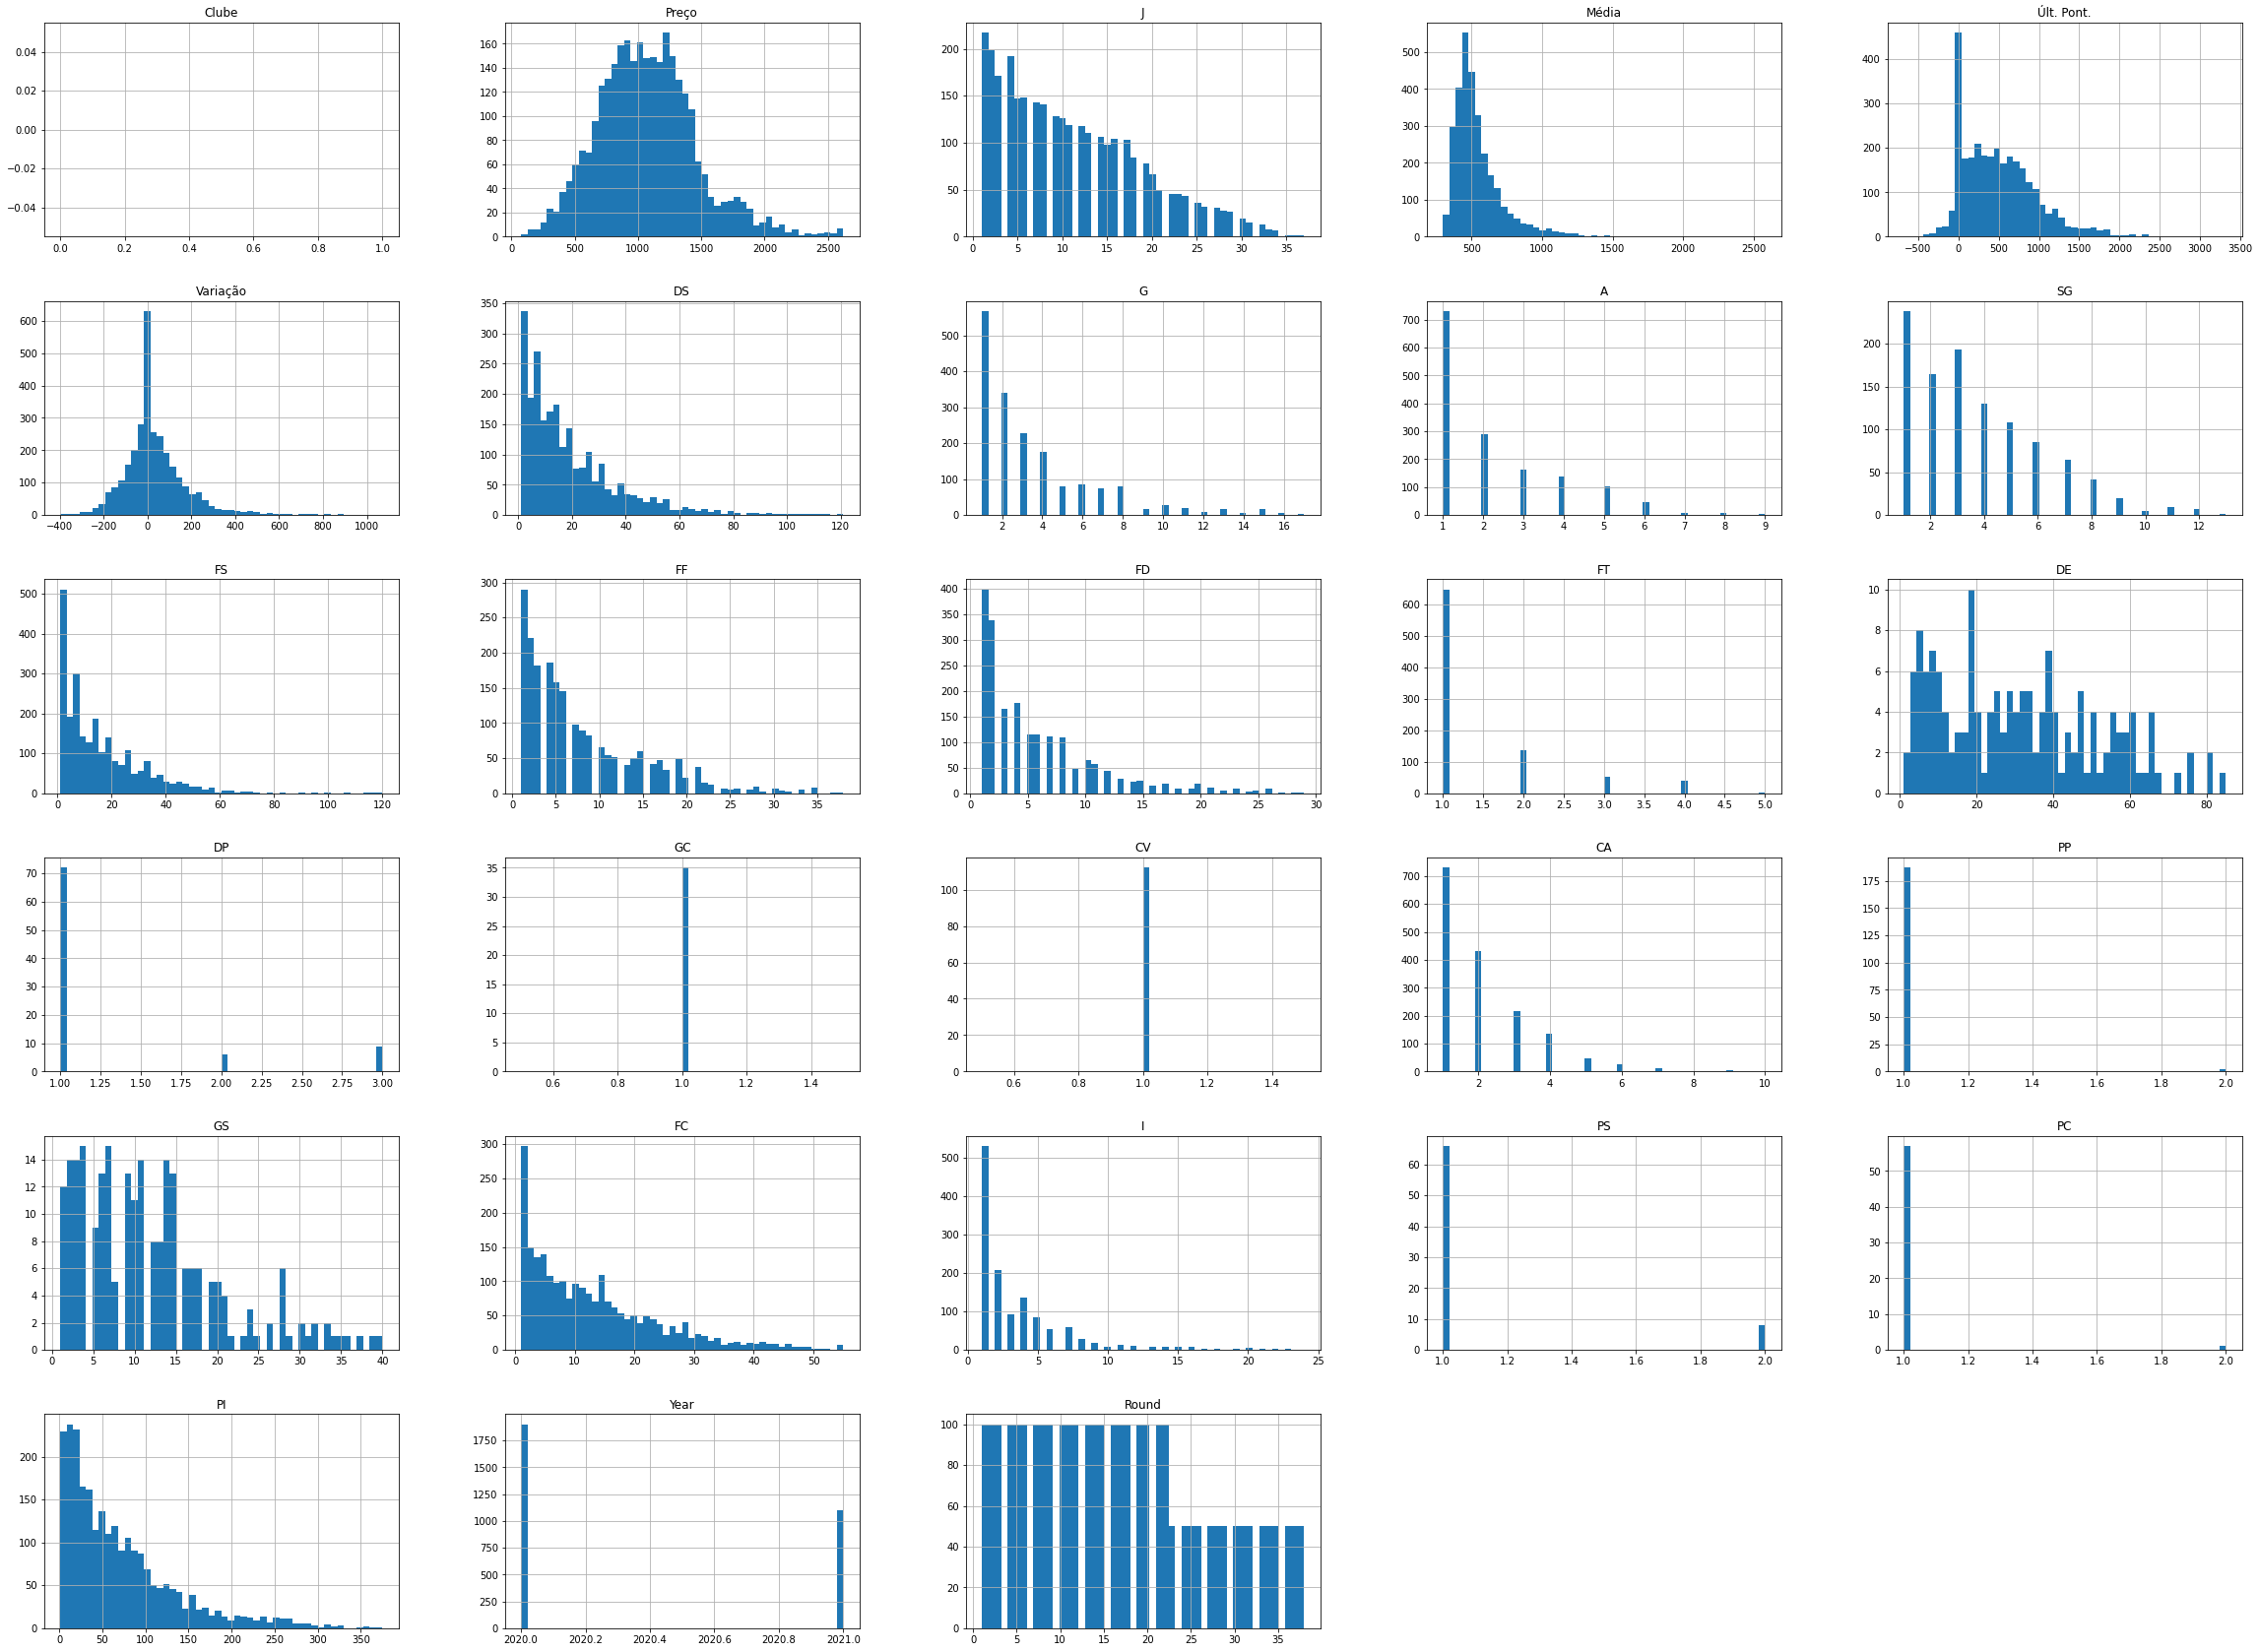

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(40,30))
save_fig("attribute_histogram_plots")
plt.show()

In [20]:
#to make this notebook's the identifical at every run 
import numpy as np
np.random.seed(42)